# Example on Trotterization in Qiskit

### Define the system's Hamiltonian

Here we have a Heisenberg Hamiltonian on a line with interaction strength $J=1/4$ and a field along the Z-axis with coefficient $g=-1$.

In [2]:
from qiskit.quantum_info import SparsePauliOp

num_sites = 5
J = 0.25
g = -1

hamiltonian = SparsePauliOp.from_sparse_list(
    [("XX", [i, i + 1], J) for i in range(num_sites - 1)]
    + [("YY", [i, i + 1], J) for i in range(num_sites - 1)]
    + [("ZZ", [i, i + 1], J) for i in range(num_sites - 1)]
    + [("Z", [i], g) for i in range(num_sites)],
    num_qubits=num_sites
)

Further we need to set the evolution time:

In [6]:
time = 0.1

### First order Trotter circuit

In [4]:
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import PauliEvolutionGate

Per default, the `PauliEvolutionGate` performs just a single Trotter step of first order. We'll adjust that further below!

In [9]:
evolution = PauliEvolutionGate(hamiltonian, time=time)

circuit = QuantumCircuit(num_sites)
circuit.append(evolution, circuit.qubits)

We can draw it with different levels of decomposition. The first level still shows the local Pauli evolutions...

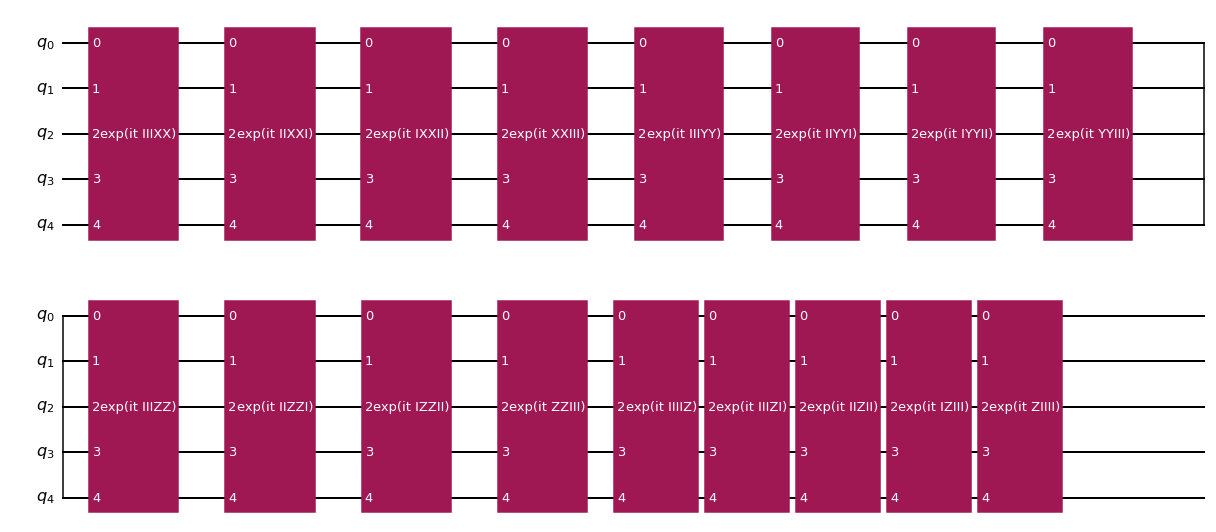

In [11]:
circuit.decompose().draw("mpl", style="iqx")

... and with a further decomposition we see the individual gates.

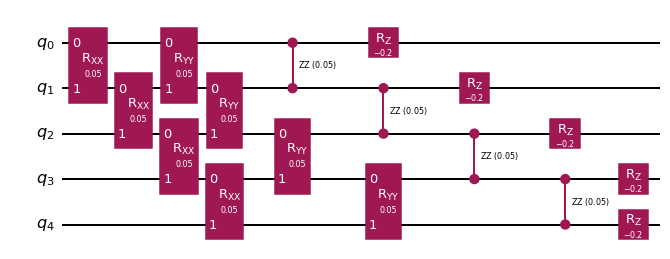

In [12]:
circuit.decompose().decompose().draw("mpl", style="iqx")

### Higher order Trotter formulas

Qiskit supports different orders of the product formula, such as first order (`LieTrotter`) or order $2n$ (`SuzukiTrotter`).

In [3]:
from qiskit.synthesis.evolution import LieTrotter, SuzukiTrotter

This also allows setting the number of Trotter steps.

In [13]:
num_steps = 4

In [19]:
synthesis = SuzukiTrotter(order=2, reps=num_steps)

evolution = PauliEvolutionGate(hamiltonian, time=time, synthesis=synthesis)

circuit = QuantumCircuit(num_sites)
circuit.append(evolution, circuit.qubits)

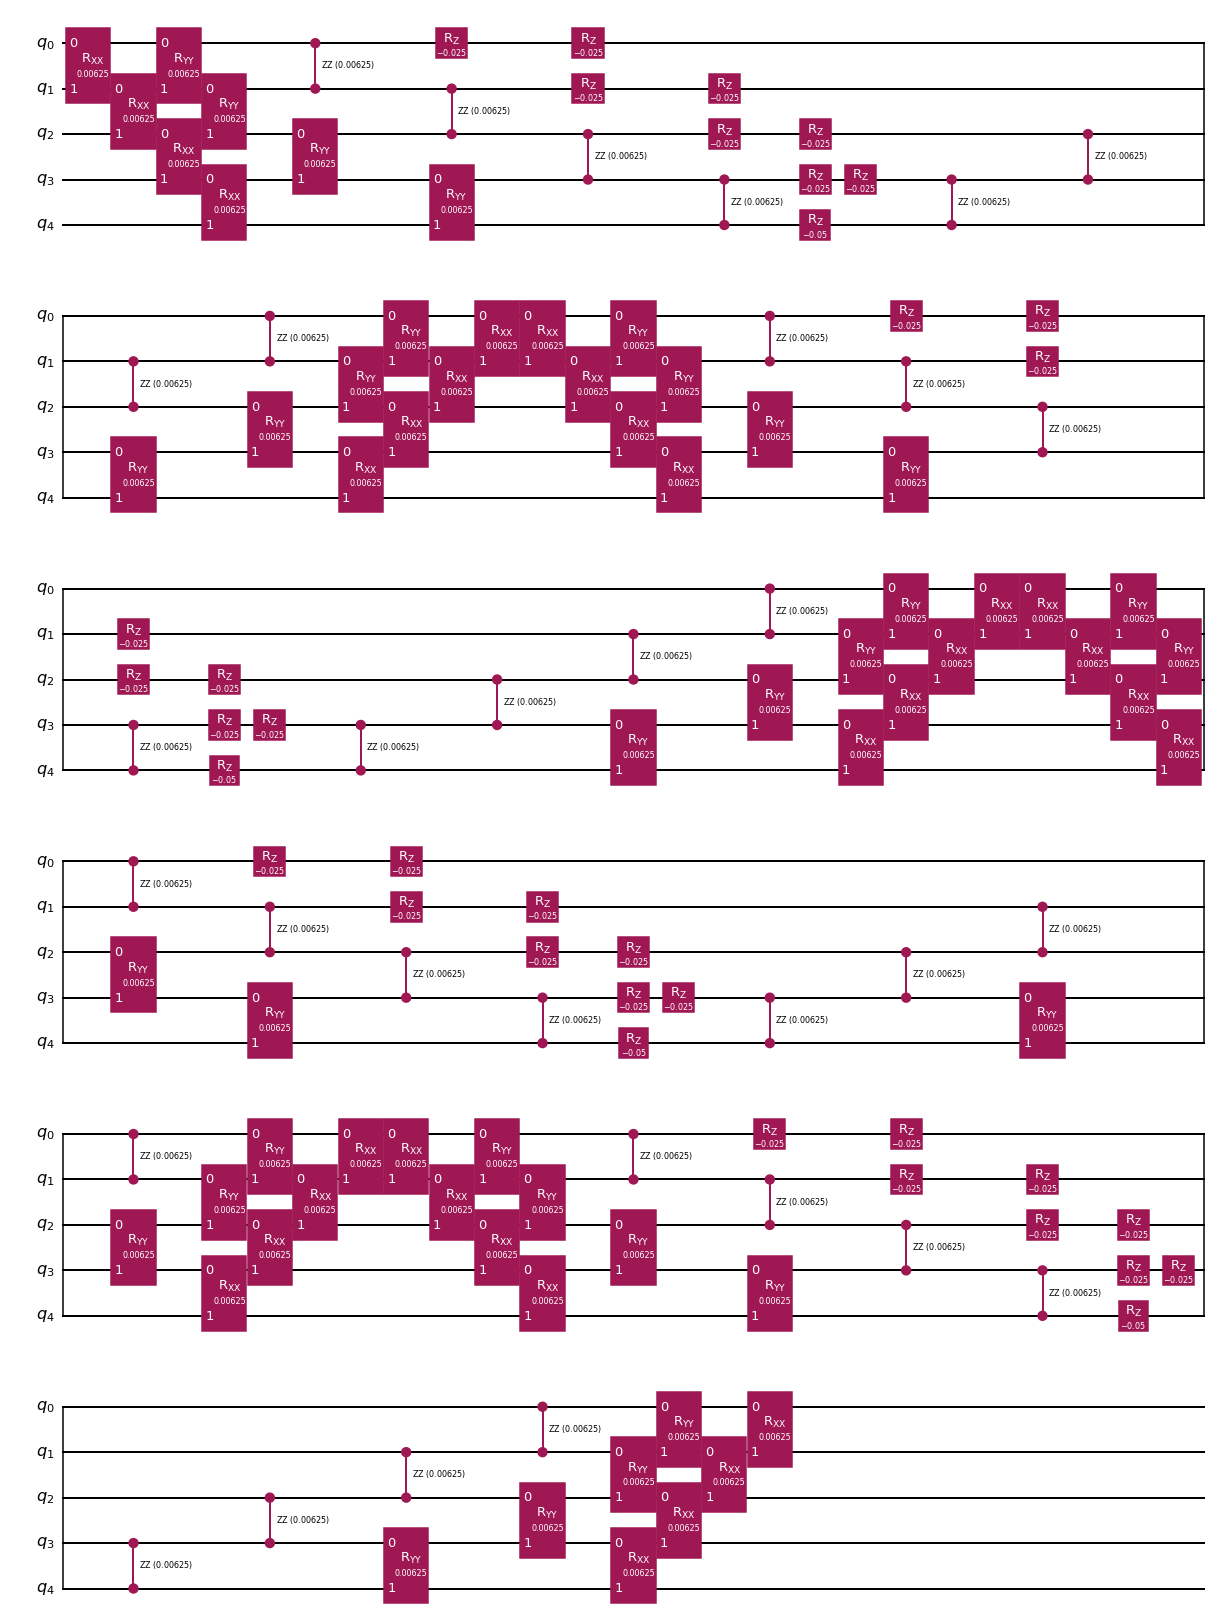

In [20]:
circuit.decompose().decompose().draw("mpl", style="iqx")

### Backend gate count

In [25]:
from qiskit import transpile
from qiskit.providers.fake_provider import FakeParis

In [26]:
backend = FakeParis()
transpiled = transpile(circuit, backend)

In [27]:
transpiled.count_ops()

OrderedDict([('rz', 233), ('cx', 186), ('sx', 90)])